In [30]:
install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))

also installing the dependencies ‘memoise’, ‘whisker’, ‘rstudioapi’, ‘git2r’, ‘withr’

Warning message in install.packages(c("repr", "IRdisplay", "evaluate", "crayon", :
“installation of package ‘git2r’ had non-zero exit status”Warning message in install.packages(c("repr", "IRdisplay", "evaluate", "crayon", :
“installation of package ‘pbdZMQ’ had non-zero exit status”Warning message in install.packages(c("repr", "IRdisplay", "evaluate", "crayon", :
“installation of package ‘devtools’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [29]:
library('tidyverse');
library('ggplot2');
library('plotly');
library('zoo');
library('lubridate');
library('ggrepel');
library('tidytext');
library('readr');
library('DescTools');
library('wordcloud');
library('formattable');

ERROR: Error in library("plotly"): there is no package called ‘plotly’


In [6]:
data<-read.csv('/home/iiitb/DataAnalyticsProject/Data/cleaned data.csv')

In [7]:
head(data)

X.2,X.1,X,institute,course_id,year,semester,userid_DI,viewed,explored,⋯,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
19330,19330,19330,HarvardX,CS50x,2012,Summer,MHxPC130288276,0,0,⋯,0,2013-08-30,NA,0,0,197757,0,0,0,0
19331,19331,19331,HarvardX,CS50x,2012,Summer,MHxPC130422039,0,0,⋯,0,2012-07-24,NA,0,0,197757,0,0,0,25
19332,19332,19332,HarvardX,CS50x,2012,Summer,MHxPC130407931,0,0,⋯,0,2012-07-24,NA,0,0,197757,0,0,0,44
19333,19333,19333,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,⋯,0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
19334,19334,19334,HarvardX,CS50x,2012,Summer,MHxPC130064950,0,0,⋯,0,2012-07-24,NA,0,0,197757,0,0,0,34
19335,19335,19335,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,⋯,0,2012-07-24,2012-12-24,107,8,7,2,0,0,19


In [8]:
tail(data)

,X.2,X.1,X,institute,course_id,year,semester,userid_DI,viewed,explored,⋯,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
466492,524624,524624,524624,MITx,6.00x,2013,Spring,MHxPC130487518,1,0,⋯,0.00,2013-01-11,2013-01-15,4,2,197757,1,0,0,28
466493,524625,524625,524625,MITx,14.73x,2013,Spring,MHxPC130174603,0,0,⋯,0.00,2013-01-11,2013-01-11,1,1,197757,0,0,0,38
466494,524626,524626,524626,MITx,6.00x,2013,Spring,MHxPC130131103,1,0,⋯,0.00,2013-01-11,2013-01-11,1,1,197757,0,0,0,33
466495,524627,524627,524627,MITx,6.002x,2013,Spring,MHxPC130317701,1,1,⋯,0.92,2013-01-11,2013-07-19,4615,77,348,19,0,0,23
466496,524628,524628,524628,MITx,6.002x,2013,Spring,MHxPC130349539,0,0,⋯,0.00,2013-01-11,NA,0,0,197757,0,0,0,25
466497,524629,524629,524629,MITx,14.73x,2013,Spring,MHxPC130012732,1,0,⋯,0.00,2013-01-11,2013-02-24,30,5,1,1,0,0,33


In [9]:
summary(data)

      X.2              X.1               X             institute     
 Min.   : 19330   Min.   : 19330   Min.   : 19330   HarvardX:318894  
 1st Qu.:135954   1st Qu.:135954   1st Qu.:135954   MITx    :147603  
 Median :252578   Median :252578   Median :252578                    
 Mean   :264856   Mean   :264856   Mean   :264856                    
 3rd Qu.:408005   3rd Qu.:408005   3rd Qu.:408005                    
 Max.   :524629   Max.   :524629   Max.   :524629                    
                                                                     
   course_id           year        semester               userid_DI     
 CS50x  :157728   Min.   :2012   Fall  :233878   MHxPC130027283:    16  
 6.00x  : 75324   1st Qu.:2012   Spring:184154   MHxPC130464954:    16  
 ER22x  : 54732   Median :2012   Summer: 48465   MHxPC130043781:    15  
 PH207x : 40186   Mean   :2012                   MHxPC130156822:    15  
 PH278x : 38125   3rd Qu.:2013                   MHxPC130165828:    15  
 6

In [32]:
course_freq<-sort(table(data$course_id),decreasing=TRUE)[1:10]
course_freq[1]

CS50x 
157728

In [37]:
top_10_course_id<-rownames(course_freq)
top_10_course_id

[1] "CS50x"  "6.00x"  "ER22x"  "PH207x" "PH278x" "6.002x" "CB22x"  "3.091x"
 [9] "8.02x"  "14.73x"

In [44]:
course_freq[[1]]
#colnames(course_freq)<-c("course","count")
#course_freqq
course_freq_count<-c()
for(i in 1:10){
    course_freq_count<-c(course_freq_count, course_freq[[i]])
}
course_freq_count



[1] 157728

[1] 157728  75324  54732  40186  38125  34294  28123  14091   8287   7993

[1] "CS50x"  "6.00x"  "ER22x"  "PH207x" "PH278x" "6.002x" "CB22x"  "3.091x"
 [9] "8.02x"  "14.73x" "157728" "75324"  "54732"  "40186"  "38125"  "34294" 
[17] "28123"  "14091"  "8287"   "7993"

In [45]:
#courses_and_freq<-c(top_10_course_id,course_freq_count)
#courses_and_freq
courses_and_freq<-data.frame(top_10_course_id,course_freq_count)
courses_and_freq

top_10_course_id,course_freq_count
CS50x,157728
6.00x,75324
ER22x,54732
PH207x,40186
PH278x,38125
6.002x,34294
CB22x,28123
3.091x,14091
8.02x,8287
14.73x,7993


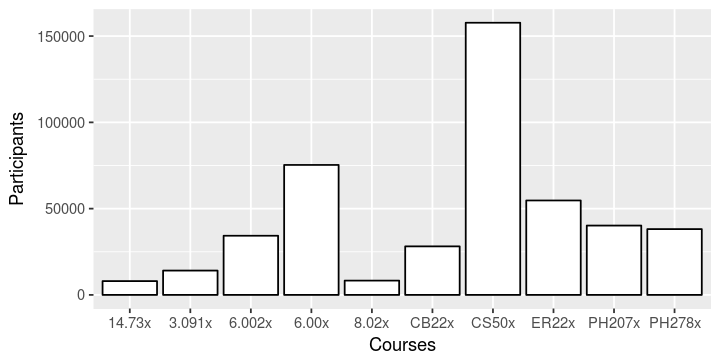

In [78]:
library(ggplot2)


course_freq_plot <- 
  ggplot(courses_and_freq, aes(top_10_course_id, course_freq_count)) + 
  geom_bar(stat="identity", colour="black", fill="white") + 
  xlab("Courses") + ylab("Participants") 

course_freq_plot

In [13]:
sort(table(data$course_id),decreasing=FALSE)[1:10]


 2.01x 8.MReV  7.00x 14.73x  8.02x 3.091x  CB22x 6.002x PH278x PH207x 
  1097   1632   4885   7993   8287  14091  28123  34294  38125  40186 

In [57]:
semester_freq<-sort(table(data$semester),decreasing=TRUE)[1:3]
semester_freq


  Fall Spring Summer 
233878 184154  48465 

[1] "Fall"   "Spring" "Summer"

[1] 233878 184154  48465

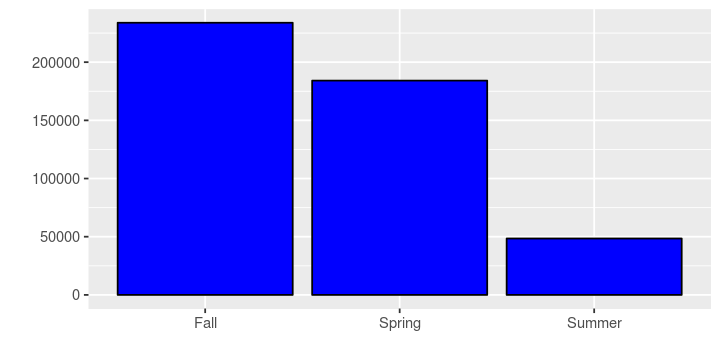

In [61]:
top_semesters<-rownames(semester_freq)
semester_freq_count<-c()
for(i in 1:3){
    semester_freq_count<-c(semester_freq_count, semester_freq[[i]])
}
top_semesters
semester_freq_count

semester_freq_df<-data.frame(top_semesters,semester_freq_count)


sem_freq_plot <- 
  ggplot(semester_freq_df, aes(x=top_semesters, y=semester_freq_count)) + 
  geom_bar(stat="identity", colour="black", fill="blue") + 
  xlab("Semester") + ylab("Participants") 

sem_freq_plot

In [76]:
print("Number of participants per institute")
institute_freq<-summary(data$institute)
institute_freq


[1] "Number of participants per institute"


HarvardX     MITx 
  318894   147603

In [73]:
institute_freq[1][1]

HarvardX 
  318894

In [82]:
options(repr.plot.width=6, repr.plot.height=3)
summary(data$year)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2012    2012    2012    2012    2013    2013 

In [85]:
yearly_count<-sort(table(data$year),decreasing=TRUE)[1:2]
yearly_count


  2012   2013 
296978 169519 

In [102]:

#agesummary=arrange(agesummary,desc(avgParticipantAge))
#temp

temp1<-data.frame(data$course_id,data$age)
#temp1

#temp<-group_by(temp1,temp1$data.course_id)
#temp

agesummary<-aggregate(temp1$data.age ~ temp1$data.course_id , temp1, mean)


In [104]:
names(agesummary)<-c("course","age")
agesummary

course,age
14.73x,28.33817
2.01x,24.37922
3.091x,24.55752
6.002x,23.75882
6.00x,26.19099
7.00x,27.84135
8.02x,25.43309
8.MReV,24.02451
CB22x,30.53291
CS50x,27.00184


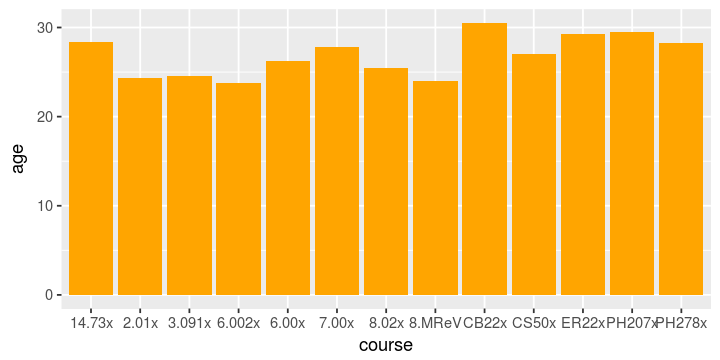

In [105]:
age_plot<-ggplot(agesummary,aes(x=agesummary$course,y=agesummary$age))+
geom_bar(stat="identity",fill="orange")+xlab("course") + ylab("age")


age_plot

In [106]:
unique(data$course_id)

[1] CS50x  PH207x ER22x  PH278x CB22x  6.00x  6.002x 3.091x 14.73x 8.02x 
[11] 7.00x  8.MReV 2.01x 
13 Levels: 14.73x 2.01x 3.091x 6.002x 6.00x 7.00x 8.02x 8.MReV CB22x ... PH278x

In [110]:
if(data$semester=="Summer"){
    if(data$year==2013){
    print("found")
    }
}

Warning message in if (data$semester == "Summer") {:
“the condition has length > 1 and only the first element will be used”

[1] "in summer"


Warning message in if (data$year == 2013) {:
“the condition has length > 1 and only the first element will be used”

In [ ]:
for()